<a id = 'initialize'></a>    
# Initialize

In [1]:
import pandas as pd
import numpy as np
from scipy import stats


# Plotting
import matplotlib as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.figsize": (15, 4)})
sns.set_context('talk')


import warnings
warnings.filterwarnings("ignore")

In [2]:
header = pd.read_csv('../data/aglog_header.csv',index_col=0)
header.head()



,Column,Type,Definition
No,,,
1,VIN,NaN,NaN
2,TDATE,NaN,NaN
3,SDATE,NaN,NaN
4,BMS_BATTST,numerical,bms_battery_status
5,BMS_BATTCURR,numerical,bms_battery_current


In [3]:
zero = 0.000001 #1e-6 

# This has a jump on odometer
#infile = '../data/vin_LMGGN1S50G1002215.csv' 
#SDATE = '2016-08-31'

infile = '../data/vin_LMGGN1S5XF1001104.csv'
SDATE = '2016-02-15'
EDATE = '2016-02-21'

SDATE = pd.to_datetime(SDATE).date()
EDATE = pd.to_datetime(EDATE).date()
print(SDATE)
print(EDATE)


df = pd.read_csv(infile,header=None)
del df[85] #skip last column
df.columns = header.Column.values
df.head()

2016-02-15
2016-02-21


,VIN,TDATE,SDATE,BMS_BATTST,BMS_BATTCURR,BMS_BATTVOLT,BMS_INSULATIONST,BMS_INSULATIONRES,BMS_CELLVOLTMAX,BMS_CELLVOLTMIN,...,LAT84,LON02,LAT02,BCS_ABSFAULTST,BCS_EBDFAULTST,MCU_DCDC_ACTTEMP,BMS_HVILST,HCU_HEVSYSREADYST,BMS_BALANCEST,GPS_HEADING
0,LMGGN1S5XF1001104,1447399501000,20151113,4.0,2.0,335.0,0.0,1022.0,3.81,3.81,...,23.042503,113.491740,23.039830,0.0,0.0,24.0,0.0,0.0,0.0,0.0
1,LMGGN1S5XF1001104,1447399511000,20151113,4.0,2.0,335.0,0.0,1000.0,3.81,3.81,...,23.042510,113.491760,23.039833,0.0,0.0,24.0,0.0,0.0,0.0,0.0
2,LMGGN1S5XF1001104,1447399521000,20151113,4.0,2.0,335.0,0.0,1000.0,3.81,3.80,...,23.042524,113.491770,23.039850,0.0,0.0,24.0,0.0,0.0,0.0,0.0
3,LMGGN1S5XF1001104,1447399532000,20151113,4.0,2.0,335.0,0.0,1000.0,3.81,3.80,...,23.042540,113.491776,23.039864,0.0,0.0,24.0,0.0,0.0,0.0,0.0
4,LMGGN1S5XF1001104,1447399562000,20151113,4.0,3.0,334.0,0.0,1000.0,3.81,3.80,...,23.042494,113.491840,23.039820,0.0,0.0,25.0,0.0,0.0,0.0,0.0


In [4]:
for icol,itype in header.loc[:,['Column','Type']].values:
    #print(icol,itype)
    if itype == 'numeric':
        df[icol] = pd.to_numeric(df[icol], errors='coerce')
        # This tries to identify if this is float or integer, but it is not accurate, e.g., for ICM_TOTALODOMETER it identifies float instead of integer
    elif itype == 'categorical':
        df[icol] = df[icol].astype('category')
df['TDATE'] = pd.to_datetime(df['TDATE'], unit='ms',
                             utc=True).dt.tz_convert('Asia/Hong_Kong')
df['SDATE'] = pd.to_datetime(df['SDATE'].astype(str),
                             utc=True).dt.tz_convert('Asia/Hong_Kong').dt.date

# Comment: integer types are not detected as integer and cannot be converted to integer unless NaN are removed with
#df[icol].dropna().astype(np.int)

<a = 'analysis'></a>    
# Stats on few days

In [5]:
# Select distinct values of Sdate
#SDATES = df.SDATE.unique()
# Take first date
#SDATE = SDATES[0]

filter1 = df.SDATE >= SDATE
filter2 = df.SDATE <= EDATE

df1 = df[ filter1 & filter2 ]
#df1 = df[filter2]
df1.head()

,VIN,TDATE,SDATE,BMS_BATTST,BMS_BATTCURR,BMS_BATTVOLT,BMS_INSULATIONST,BMS_INSULATIONRES,BMS_CELLVOLTMAX,BMS_CELLVOLTMIN,...,LAT84,LON02,LAT02,BCS_ABSFAULTST,BCS_EBDFAULTST,MCU_DCDC_ACTTEMP,BMS_HVILST,HCU_HEVSYSREADYST,BMS_BALANCEST,GPS_HEADING
122060,LMGGN1S5XF1001104,2016-02-15 00:00:08+08:00,2016-02-15,4.0,29.5,314.0,0.0,1022.0,3.58,3.56,...,31.246922,121.396010,31.245092,0.0,0.0,29.0,0.0,1.0,0.0,280.0
122061,LMGGN1S5XF1001104,2016-02-15 00:00:18+08:00,2016-02-15,4.0,23.5,315.0,0.0,1022.0,3.59,3.58,...,31.247250,121.394370,31.245419,0.0,0.0,28.0,0.0,1.0,0.0,285.0
122062,LMGGN1S5XF1001104,2016-02-15 00:00:28+08:00,2016-02-15,4.0,24.5,314.0,0.0,1022.0,3.58,3.56,...,31.247753,121.392494,31.245920,0.0,0.0,27.0,0.0,1.0,0.0,287.0
122063,LMGGN1S5XF1001104,2016-02-15 00:00:38+08:00,2016-02-15,4.0,21.0,315.0,0.0,1000.0,3.58,3.57,...,31.248272,121.390570,31.246439,0.0,0.0,27.0,0.0,1.0,0.0,287.0
122064,LMGGN1S5XF1001104,2016-02-15 00:00:48+08:00,2016-02-15,4.0,26.0,314.0,0.0,1000.0,3.58,3.56,...,31.248854,121.388510,31.247019,0.0,0.0,26.0,0.0,1.0,0.0,289.0


<a id='outliers'></a>    
# Remove outliers

In [6]:
filter1 = df1['BMS_BATTSOC'] > zero
filter2 = df1['BMS_CELLVOLTMIN'] > zero
filter3 = df1['BMS_CELLVOLTMAX'] >= df1['BMS_CELLVOLTMIN']
filter4 = df1['BMS_BATTTEMPAVG'] > zero
filter5 = df1['BMS_BATTTEMPMIN'] > zero
filter6 = df1['BMS_BATTTEMPMAX'] > zero

len1 = len(df1)
filter_outliers = filter1 & filter2 & filter3 & filter4 & filter5 & filter6
df1 = df1[filter_outliers]
len2 = len(df1)
print('Removed {} outilers'.format(len1-len2))

Removed 612 outilers


In [7]:
# Convert odometer to integer and remove NaNs
df1 = df1[df1['ICM_TOTALODOMETER'].notna()]
df1['ICM_TOTALODOMETER'] = df1['ICM_TOTALODOMETER'].astype(int)

In [8]:
# Add cell volt diff
df1['BMS_CELLVOLTDIFF'] = df1['BMS_CELLVOLTMAX'] - df1['BMS_CELLVOLTMIN']
# Sort dataframe
df1 = df1.sort_values(by=['TDATE', 'ICM_TOTALODOMETER'])
df1.describe()


,BMS_BATTST,BMS_BATTCURR,BMS_BATTVOLT,BMS_INSULATIONRES,BMS_CELLVOLTMAX,BMS_CELLVOLTMIN,BMS_FAILURELVL,BMS_BATTSOC,BMS_BATTTEMPAVG,BMS_BATTTEMPMAX,...,EDV_STERRLVLVEH,LON84,LAT84,LON02,LAT02,BCS_EBDFAULTST,MCU_DCDC_ACTTEMP,BMS_BALANCEST,GPS_HEADING,BMS_CELLVOLTDIFF
count,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.0,11383.000000,11383.000000,11383.000000,...,11383.0,11092.000000,11092.000000,11092.000000,11092.000000,11379.000000,11383.000000,11383.0,11092.000000,11383.000000
mean,4.001318,4.245849,326.004744,1009.700430,3.717750,3.704000,0.0,38.449056,18.726786,19.065361,...,0.0,121.319270,31.166753,121.323836,31.164827,0.000264,29.348590,0.0,122.643707,0.013750
std,0.086407,29.013068,11.454569,17.288823,0.129411,0.129947,0.0,18.505176,2.492887,2.522319,...,0.0,0.203011,0.291902,0.203129,0.292091,0.016236,6.421558,0.0,118.263866,0.005864
min,3.000000,-143.000000,293.000000,0.000000,3.360000,3.330000,0.0,21.300000,10.000000,10.000000,...,0.0,120.589010,30.017498,120.593090,30.014856,0.000000,4.000000,0.0,0.000000,0.000000
25%,4.000000,-6.500000,319.000000,1000.000000,3.640000,3.630000,0.0,28.500000,17.500000,18.000000,...,0.0,121.351325,31.206986,121.355925,31.205059,0.000000,26.000000,0.0,0.000000,0.010000
50%,4.000000,2.000000,322.000000,1000.000000,3.670000,3.660000,0.0,29.900000,19.000000,20.000000,...,0.0,121.380905,31.259594,121.385542,31.257713,0.000000,29.000000,0.0,96.000000,0.010000
75%,4.000000,14.000000,328.000000,1022.000000,3.750000,3.730000,0.0,35.800000,20.500000,21.000000,...,0.0,121.408880,31.291098,121.413532,31.289262,0.000000,33.000000,0.0,218.000000,0.020000
max,9.000000,154.000000,365.000000,1022.000000,4.160000,4.140000,0.0,99.900000,24.500000,25.000000,...,0.0,121.550040,31.384230,121.554320,31.382320,1.000000,49.000000,0.0,359.000000,0.100000


#  Charging and driving states
**Nf** number of records    
**Nd** number of records for driving state      
**Nc** number of records for charging state    

See get_daily_stats

In [9]:
filter1 = df1['ICM_TOTALODOMETER'] > 0
filter2 = (df1['CCS_CHARGECUR'] < 0.1) | (df1['CCS_CHARGECUR'].isna())
# Battery charging status = 0  means is not charging
filter3 = (df1['HCU_BATCHRGDSP'] == 0) | (df1['HCU_BATCHRGDSP'].isna())
#filter4 = df1['BCS_VEHSPD'] > zero #! added

filter_driving = filter1 & filter2 & filter3 
filter_charging = df1['CCS_CHARGECUR'] > zero


Nf = len(df1)

df_driving = df1.loc[filter_driving]
df_charging = df1.loc[filter_charging]

Nc = len(df_charging)
Nd = len(df_driving)

print('Nf {}'.format(Nf))
print('Nc {}'.format(Nc))
print('Nd {}'.format(Nd))

Nf 11383
Nc 0
Nd 11383


<a id='drive_on_battery'></a>    
# Drive on battery      

## Filter out only trips driving on battery     
A pure electrical trip is when HCU_AVGFUELCONSUMP = 0 and BMS_BATTSOC > 40    

**Note**  
If Nd < 10, then we don't have enough points and we should skip this analysis

In [10]:
filter1 = df_driving['HCU_AVGFUELCONSUMP'] == 0
filter2 = df_driving['BMS_BATTSOC'] > 40
filter_driving_battery = filter1 & filter2
db = df_driving[filter_driving_battery]   

In [11]:
def get_time(x):
    hour = x.hour
    minute = x.minute
    second = x.second
    day = x.day
    time = second + minute*60 + hour*3600 + day*3600*24 # in seconds
    time = time/60/60/24 # convert to days
    return time

db['time'] = db['TDATE'].apply(get_time)

Text(0.5,0,'Time (days)')

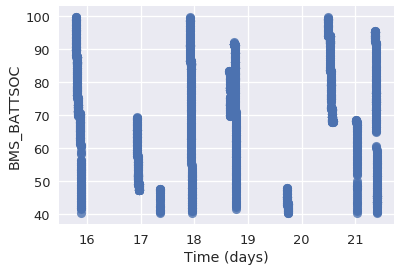

In [19]:
ax = sns.regplot(x="time", y="BMS_BATTSOC", data=db, fit_reg=False)
ax.set_xlabel('Time (days)')


In [46]:
def find_trips_on_battery(db, window_up_min=90,
    window_dn_min=60, window_dn_max=70,ending_date=None):
    """
    Finds trips on battery only.
    In a trip the battery SOC goes from a high value to a low value, defined as windows variables:
        SOC goes frmo a windows_up region up to a windows_dn region


    Arguments:
    ------
    db: pandas dataframe with driving on battery only periods

    Optional:
    ---------
    window_up_min:  int, set an upper window for SOC values in a trip
        default:  90
        window_up_max is set to 100 and cannot be changed
    window_dn_min, window_dn_max: int, set a lower window for SOC values in a trip
        default: 60, 70
    ending_date: datetime, ending date of trip, default = last SDATE in db


    Output:
    -------
    self.trips, list of trips
         each trip consists of dataframes, one dataframe for each trip found.

    Side effects:
    -------------
    db is ordered in descending order
    It finds trips ending on "ending_date"
    """

    trips = []
    #window_up_max = 100 # this is actually not used
    offset_delta_soc = 1 # allow SOC to recharge by this value once or more during a trip
    
    db.sort_values(by=['TDATE', 'ICM_TOTALODOMETER'], ascending=False, inplace=True)


    # Set by default ending_date of trip = last date in the data frame
    if (ending_date == None) & (len(db) > 0):
        ending_date = db.iloc[0]['SDATE']
    #
    # Algorithm to find trips
    #
    state = 0 # sets the status of the algorithm
    complete_trip = False # This is set to True when we find a complete trip
    # Note that DB is sorted in reverse order, so we will cycle rows from older to newer timestamps
    for index,row in db.iterrows():
        sdate = row['SDATE']
        bms_battsoc = row['BMS_BATTSOC']
        #
        # state = 0: Finds the end of a trip, if equals to ending_date then goto state = 1
        #
        if state == 0:
            # Check if SOC is inside the accepted window
            if bms_battsoc >= window_dn_min:
                if bms_battsoc <= window_dn_max:
                    # Check that trip ends on ending_date
                    if sdate == ending_date :
                        trip = []
                        trip.append(row)
                        last_soc = bms_battsoc # keep track of previous records
                        complete_trip = False # This flag will be set when the trip is completed
                        state = 1
                    else:
                        # If we enter here, it means that the end date of this trip is different
                        # than last_date, so we exit here
                        break
        #
        # state = 1: Check entries until it finds the beggining of the trip
        #
        elif state == 1:
            # Check that this SOC is lower than last SOC (it did not recharge battery)
            # we assume SOC will decrease with time,
            # as time is ordered in reverse order,
            # bms_battsoc should be greater equal to the previous SOC (from the next timestamp)
            delta_soc = bms_battsoc - last_soc
            
            if delta_soc > - offset_delta_soc :
                trip.append(row)
                last_soc = bms_battsoc
                # Check that SOC reaches window_up
                if bms_battsoc >= window_up_min:
                    complete_trip = True

            # SOC was probably recharged
            else:
                # Check if we have a complete trip to save
                if complete_trip:
                    complete_trip = False
                    # Save this trip.
                    db1 = pd.DataFrame(trip)
                    trips.append(db1)
                # Cycle and look for next trips
                state = 0

    # Consider the case in which the last entry of the data set completes a trip,
    # in such case, the trip is not saved above:
    if complete_trip:
        complete_trip = False
        #Travel completed, save this trip.
        db1 = pd.DataFrame(trip)
        trips.append(db1)
    
    return trips

In [47]:
trips = find_trips_on_battery(db)

# Analysis by travel

In [48]:
# How many travels were recorded?
print(" {} trips found".format(len(trips)))
db1 = trips[0]
db2 = trips[1]

 2 trips found


Text(0.5,21.2,'Time (days)')

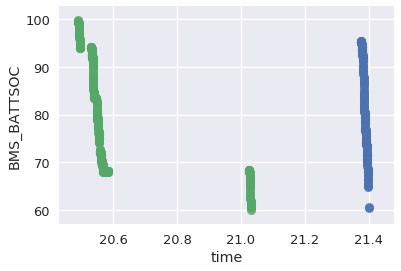

In [49]:

ax2 = sns.regplot(x="time", y="BMS_BATTSOC", data=db1, fit_reg=False)
ax2 = sns.regplot(x="time", y="BMS_BATTSOC", data=db2, fit_reg=False)
ax.set_xlabel('Time (days)')
